<a href="https://colab.research.google.com/github/Manash-Christ/ML-LABS/blob/main/2348528_lab9%2610.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

In [3]:
source_path_train = "/content/drive/MyDrive/Colab Notebooks/MRI/Training"
source_path_test = "/content/drive/MyDrive/Colab Notebooks/MRI/Testing"
categories = os.listdir(source_path_train)
for category in categories:
    os.listdir(os.path.join(source_path_train,category))

classes = {'glioma_tumor':0, 'meningioma_tumor':1, 'no_tumor':2, 'pituitary_tumor':3 }
classes

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

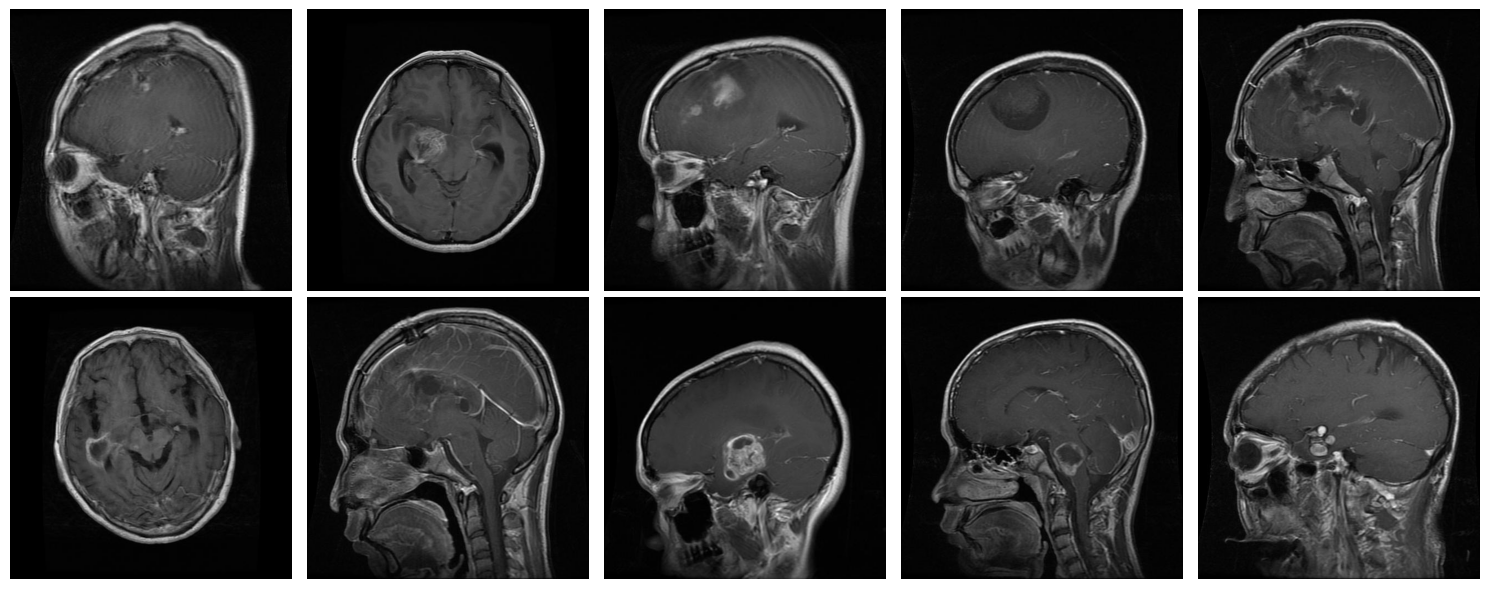

In [4]:
path_image= '/content/drive/MyDrive/Colab Notebooks/MRI/Training/glioma_tumor/'
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
random_indices = random.sample(range(1, 101), 10)

for i, idx in enumerate(random_indices, 1):
    file_path = os.path.join(path_image, f'gg ({idx}).jpg')
    image = Image.open(file_path)
    subplot_row = (i - 1) // 5
    subplot_col = (i - 1) % 5
    axes[subplot_row, subplot_col].imshow(image)
    axes[subplot_row, subplot_col].axis('off')
plt.tight_layout()
plt.show()

In [5]:
X = []
Y = []
for cls in classes:
    pth = source_path_train + '//' + cls
    for j in os.listdir(pth):
        if "Zone.Identifier" not in j:
            img = Image.open(pth + '//' + j)
            img = img.resize((200, 200))
            X.append(np.array(img))
            Y.append(classes[cls])

In [6]:
for cls in classes:
    pth = source_path_test + '//' + cls
    for j in os.listdir(pth):
        if "Zone.Identifier" not in j:
            img = Image.open(pth + '//' + j)
            img = img.resize((200, 200))
            X.append(np.array(img))
            Y.append(classes[cls])

<Axes: >

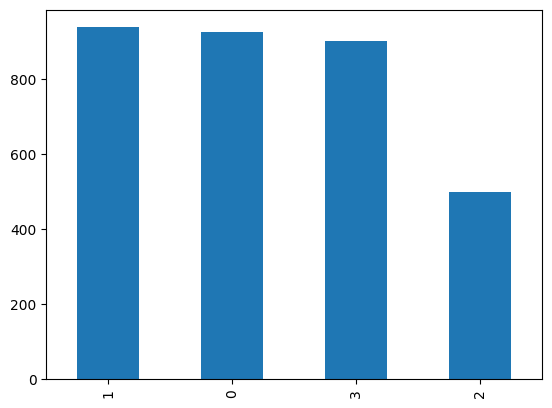

In [7]:
pd.Series(Y).value_counts().plot(kind='bar')

In [8]:
X = np.array(X)
Y = np.array(Y)
X_updated = X.reshape(len(X), -1)
X_updated.shape

(3264, 120000)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_updated, Y, random_state = 10, test_size = 0.20)

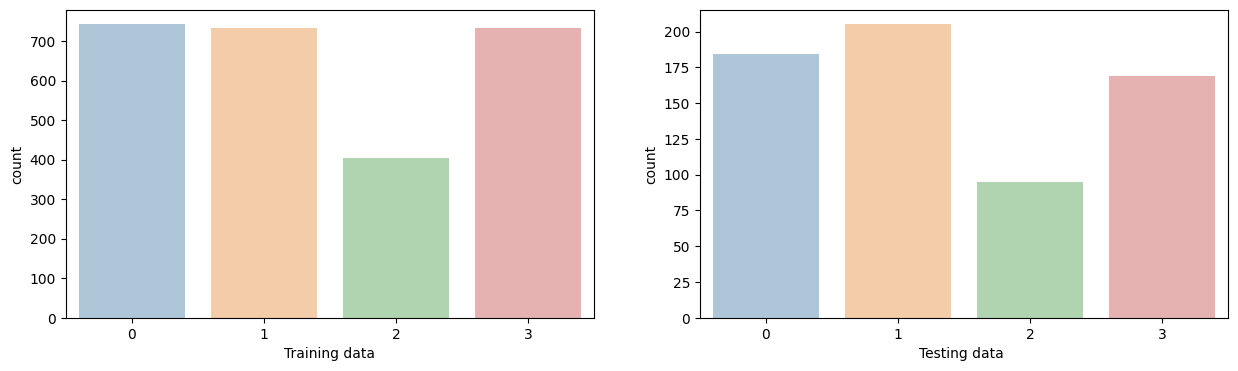

In [10]:
plt.figure(figsize = (15,4));
lis = ['Training data', 'Testing data ']
for i,j in enumerate([y_train, y_test]):
    plt.subplot(1,2, i+1);
    sns.countplot(x = j,alpha=0.4 );
    plt.xlabel(lis[i])

In [11]:
print(f'The final shape of training and testing samples are: {X_train.shape, X_test.shape}')


The final shape of training and testing samples are: ((2611, 120000), (653, 120000))


In [12]:
X_train_updated = X_train.reshape(len(X_train), -1)
X_test_updated = X_test.reshape(len(X_test), -1)
X_train_updated.shape ,X_test_updated.shape

((2611, 120000), (653, 120000))

In [13]:
print(X_train_updated.max(), X_train_updated.min())
print(X_test_updated.max(), X_test_updated.min())
X_train_updated = X_train_updated/255
X_test_updated = X_test_updated/255
print(X_train_updated.max(), X_train_updated.min())
print(X_test_updated.max(), X_test_updated.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [14]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


svm = SVC(kernel='rbf')
svm.fit(X_train_updated, y_train)
y_pred =svm.predict(X_test_updated)
accuracy = accuracy_score( y_test,y_pred)
CM_svm = confusion_matrix(y_test, y_pred)
print("Accuracy : ", accuracy * 100, '%')
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )


Accuracy :  84.99234303215927 %
Classification Report is :                precision    recall  f1-score   support

           0       0.82      0.85      0.84       184
           1       0.87      0.73      0.79       205
           2       0.81      0.87      0.84        95
           3       0.89      0.98      0.93       169

    accuracy                           0.85       653
   macro avg       0.85      0.86      0.85       653
weighted avg       0.85      0.85      0.85       653



NameError: ignored

In [ ]:
sns.heatmap(CM_svm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
misclassified=np.where(ytest!=pred)
misclassified

In [ ]:
plt.figure(figsize=(12,8))
c=1
path='/content/archive/Testing/no_tumor'
for i in os.listdir(path)[:9]:
  img=cv2.imread(os.path.join(path,i),0)
  if img is not None:
    p=sv.predict(cv2.resize(img,(200,200)).reshape(1,-1)/255)
    plt.subplot(3,3,c)
    plt.title(dec.get(p[0],'UnKnown'))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1
  else:
    print(f"Fail to load image:{i}")
    plt.show()

In [ ]:
plt.figure(figsize=(12,8))
c=1
path='/content/archive/Testing/pituitary_tumor'
for i in os.listdir(path)[:30]:
  img=cv2.imread(os.path.join(path,i),0)
  if img is not None:
    p=sv.predict(cv2.resize(img,(200,200)).reshape(1,-1)/255)
    plt.subplot(5,6,c)
    plt.title(dec.get(p[0],'UnKnown'))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1
  else:
    print(f'Failed to Load Image:{i}')
    plt.show()



In [ ]:
#knn